<h1> PCA Implementation 3D -> 2D, from scratch </h1>

PCA applied to 3-dimensional points to get 2-dimensional points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2> #0 Reading the data

Inputs: 50 points such as (x1, x2, x3), in a text file.

In [2]:
with open('data_pca_3d.txt','r') as f:
    data = f.read().splitlines()
    
x1_list = []
x2_list = []
x3_list = []

for line in data:
    x1, x2, x3 = line.split(' ')
    x1_list.append(float(x1))
    x2_list.append(float(x2))
    x3_list.append(float(x3))
    
x1_arr = np.array(x1_list).reshape((50,1))
x2_arr = np.array(x2_list).reshape((50,1))
x3_arr = np.array(x3_list).reshape((50,1))

X = np.concatenate((x1_arr,x2_arr, x3_arr), axis=1)
print(X.shape)

I = X.shape[0] #nb of data 
N = X.shape[1] #nb of features
P = 2          #dimension target

(50, 3)


<h3> Plotting the dataset in 3D

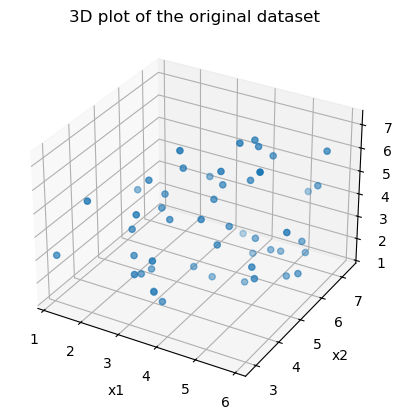

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1] ,X[:,2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("3D plot of the original dataset")
plt.grid(True)
plt.show()

<h2>#1 Computing µ (the mean of the data)

In [4]:
#Mean of each feature (x1, x2, x3)
mu = np.mean(X, axis=0).reshape(1,3)

print(mu.shape)
print(mu)

(1, 3)
[[3.989264 5.002806 3.937305]]


<h3> Plotting µ among the dataset

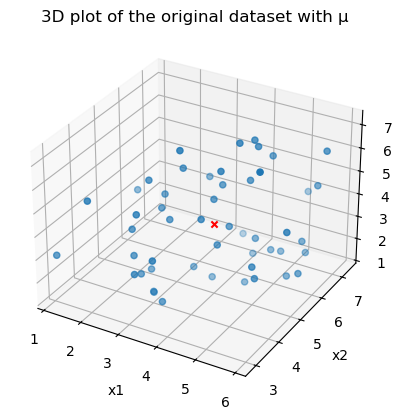

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1] ,X[:,2])
ax.scatter(mu[:,0], mu[:,1], mu[:,2], color='red', marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("3D plot of the original dataset with µ")
plt.grid(True)
plt.show()

<h2>#2 Center the input examples to the origin: For each i: X_tild = X - µ

In [6]:
X_tild = X[:,] - mu[:,]
print(X_tild.shape)

(50, 3)


<h3> Plotting the centered dataset

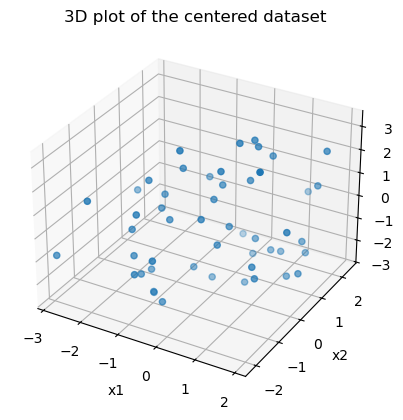

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tild[:,0],X_tild[:,1] ,X_tild[:,2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("3D plot of the centered dataset")
plt.grid(True)
plt.show()

<h2>#3 Compute the covariance of X_tild: Sigma = (1/I-1) sum (X_tild* X_tild.T)

In [8]:
#Formula of unbiased covariance, like np.cov()
sigma = (1 / (I - 1)) * (X_tild.T @ X_tild)

print(sigma.shape)
print(sigma)

(3, 3)
[[1.37606477 0.88301454 0.02504726]
 [0.88301454 1.04737128 0.27053694]
 [0.02504726 0.27053694 3.19037565]]


<h2>#4 Compute the P-largest eighenvectors of Sigma to find Up

In [9]:
#eigen values matrix (N x 1)
L = np.linalg.eigh(sigma)[0].reshape(N,1)
print(L.shape)
print(L)

#eigen vectors matrix (N x N)
U = np.linalg.eigh(sigma)[1]
print(U.shape)
print(U)

#We suppose that L (l1, l2, l3) is in ascending order, such as l1>l2>l3, but here it's the opposite so we flip !
L_flip = np.flip(L, axis=0)
print(L_flip)

U_flip = np.flip(U, axis=1)
print(U_flip)

#We take the P first vectors of the eigen vectors matrix, supposing that vectors are (3,1)
Up = U[:,0:P]
print(Up.shape)
print(Up)

(3, 1)
[[0.30068418]
 [2.07732754]
 [3.23579998]]
(3, 3)
[[-0.63224985  0.76977244  0.08780953]
 [ 0.77188081  0.61606827  0.15703473]
 [-0.06678434 -0.16706368  0.98368165]]
[[3.23579998]
 [2.07732754]
 [0.30068418]]
[[ 0.08780953  0.76977244 -0.63224985]
 [ 0.15703473  0.61606827  0.77188081]
 [ 0.98368165 -0.16706368 -0.06678434]]
(3, 2)
[[-0.63224985  0.76977244]
 [ 0.77188081  0.61606827]
 [-0.06678434 -0.16706368]]


<h2> #5 Project X_tild onto Y_tild = X_tild @ Up

In [10]:
#Project X_tild in the vector space generated by the P-largest eighenvectors
Y_tild = X_tild@Up
print(Y_tild.shape)

(50, 2)


<h2> #6 Represent Y_tild on a N-dimensional centered space w/ Y_tild_3D = Y_tild@Up.T

(50, 3)


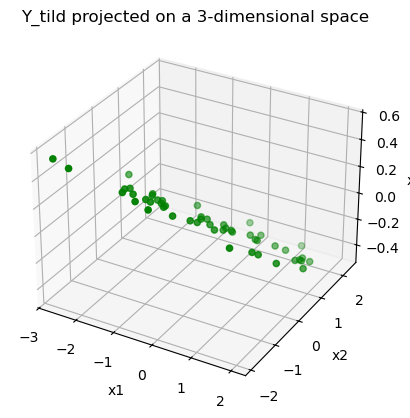

In [11]:
Y_tild_3D = Y_tild@Up.T
print(Y_tild_3D.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Y_tild_3D[:,0],Y_tild_3D[:,1] ,Y_tild_3D[:,2], color='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Y_tild projected on a 3-dimensional space")
plt.grid(True)
plt.show()

<h2> #7 Compute Y from Y_tild such as Y = Y_tild_3D + µ 

In [12]:
Y = Y_tild_3D[:,] + mu[:,]
print(Y.shape)

(50, 3)


<h3> Plotting Y projected in 3-dimensional space w/ the original dataset

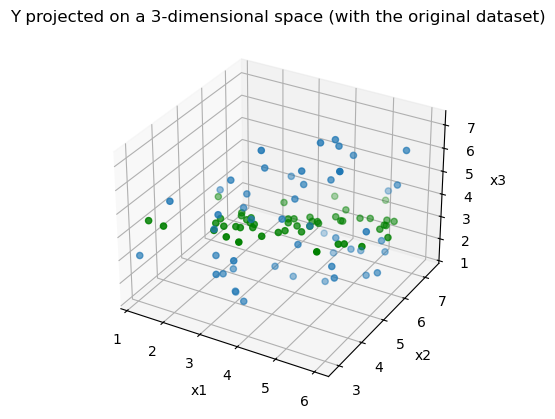

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1] ,X[:,2])
ax.scatter(Y[:,0],Y[:,1] ,Y[:,2], color='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title("Y projected on a 3-dimensional space (with the original dataset)")
plt.grid(True)
plt.show()

<h2> Final: Plotting the dimension reduction from 3D to 2D

0.061x + 0.108y + 0.678z + -3.453 = 0


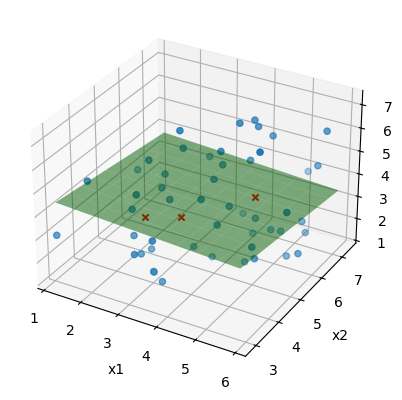

In [14]:
# Randomly taking 3 points (without replace) of Y to create a plan
rand_i = np.random.choice(I, size=3, replace=False)
p1, p2, p3 = Y[rand_i[0]], Y[rand_i[1]], Y[rand_i[2]]

# Compute two vectors from the three points
v1, v2 = (p2-p1), (p3-p1)

# Compute the normal to the plane using the cross product
normal = np.cross(v1, v2)
a, b, c = normal
d = -np.dot(normal, p1)
print(f"{a:.3f}x + {b:.3f}y + {c:.3f}z + {d:.3f} = 0")

# Create a meshgrid for plotting the plane
x_vals = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)
y_vals = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 10)
xx, yy = np.meshgrid(x_vals, y_vals)
zz = (-a * xx - b * yy - d) / c  # Solve for Z (ax+by+cz+d=0)

# Plot the points and the plane
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(*p1, color='red', marker='x')               #Y's random points used to create the plan
ax.scatter(*p2, color='red', marker='x')
ax.scatter(*p3, color='red', marker='x')
ax.scatter(X[:,0],X[:,1] ,X[:,2])                      #plotting the OG dataset
ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')  #plotting the plan
#ax.scatter(Y[:,0],Y[:,1] ,Y[:,2], color='green')      #plotting Y_3D
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.grid(True)
plt.show()


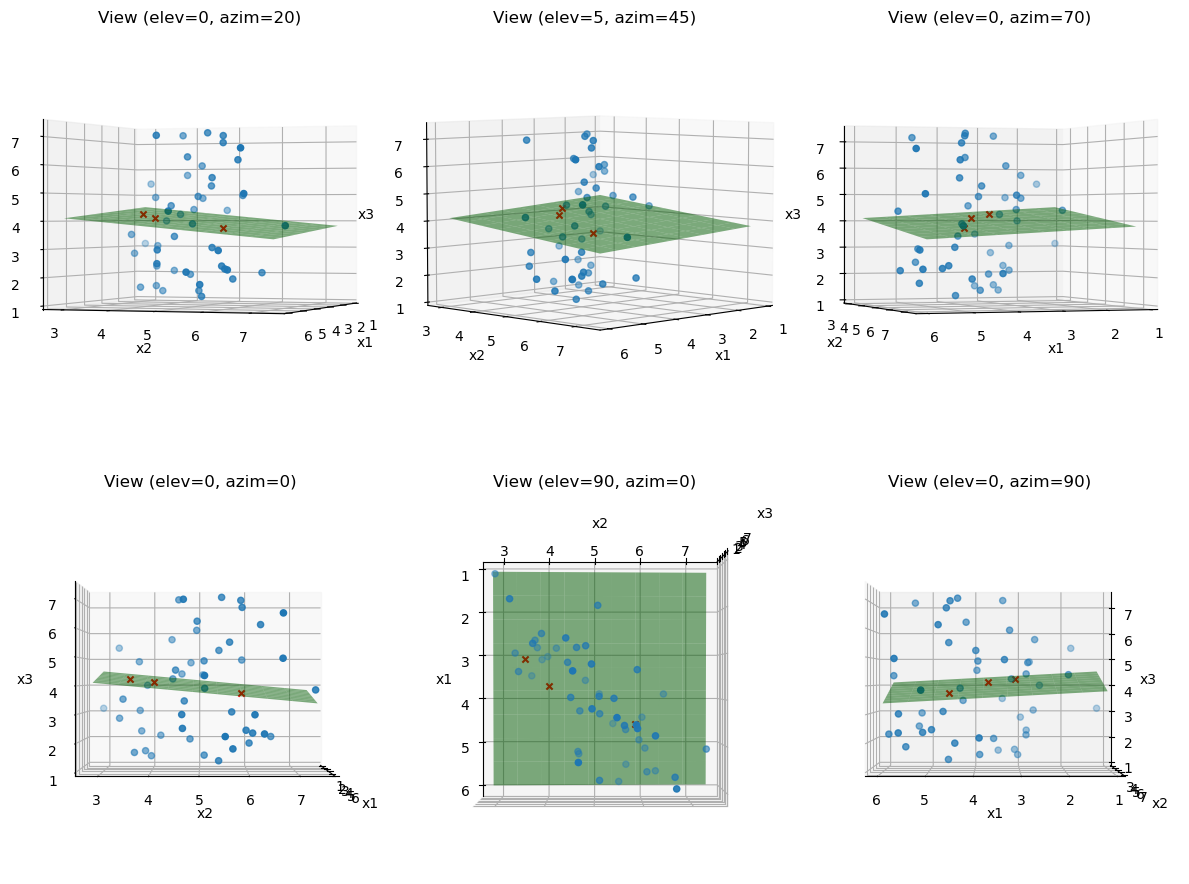

In [15]:
# Different viewpoints
viewpoints = [(0, 20), (5, 45),(0, 70), (0, 0), (90, 0), (0, 90)]  # (elev, azim)

# Create subplots for different viewpoints
fig, axes = plt.subplots(2, 3, subplot_kw={'projection': '3d'}, figsize=(12, 10))

for ax, (elev, azim) in zip(axes.flat, viewpoints):
    ax.scatter(*p1, color='red', marker='x')               #Y's random points used to create the plan
    ax.scatter(*p2, color='red', marker='x')
    ax.scatter(*p3, color='red', marker='x')    
    ax.scatter(X[:,0],X[:,1] ,X[:,2])                      #plotting the OG dataset
    ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')  #plotting the plan
    #ax.scatter(Y[:,0],Y[:,1] ,Y[:,2], color='green')      #plotting Y_3D
    
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title(f"View (elev={elev}, azim={azim})")
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()

<h2> Bonus: Y_pred projected in its dimension (just on a plan)

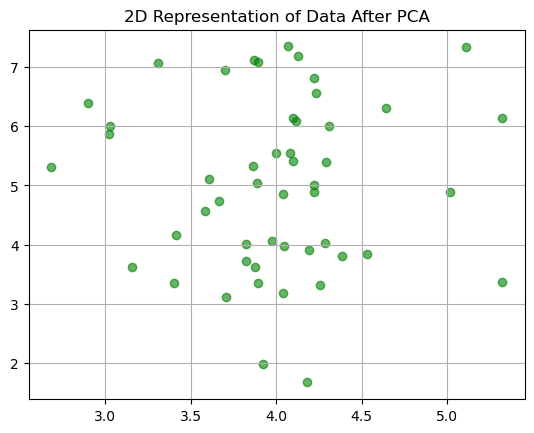

In [16]:
Y_2D = Y_tild[:,] + mu[:,0:P]

plt.scatter(Y_2D[:,0], Y_2D[:,1], color='green', alpha=0.6)
plt.title("2D Representation of Data After PCA")
plt.grid(True)
plt.show()